# Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.

Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:
a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?
b. If the weekly sales show a seasonal trend, when and what could be the reason?
c. Does temperature affect the weekly sales in any manner?
d. How is the Consumer Price index affecting the weekly sales of various stores?
e. Top performing stores according to the historical data.
f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.

# IMPORT LIBRARIES

In [2]:
# Importing all necessary libraries to proceed with this project.
import pandas as pd
import numpy as np
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")
#Importing Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
palette = px.colors.qualitative.Safe
%matplotlib inline
#Other preprocessing machine learning libraries
import itertools
import scipy.stats as stats
import calendar
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score                        
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
# Import timedelta from datetime library
from datetime import timedelta
ss = StandardScaler()

# LOAD DATA,DATA CLEANING

In [3]:
df=pd.read_csv("Walmart DataSet.csv")
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [3]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 6435 rows and 8 columns


In [4]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Here date column is in object type; so,we need to convert it into datetime

In [4]:
# Converting date column to datetime 
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [7]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
percent_missing=df.isnull().sum()*100/len(df)
percent_missing

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [12]:
df.describe().T

count          mean            std         min         25%  \
Store         6435.0  2.300000e+01      12.988182       1.000      12.000   
Weekly_Sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
Holiday_Flag  6435.0  6.993007e-02       0.255049       0.000       0.000   
Temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
Fuel_Price    6435.0  3.358607e+00       0.459020       2.472       2.933   
CPI           6435.0  1.715784e+02      39.356712     126.064     131.735   
Unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   

                        50%           75%           max  
Store             23.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  960746.040000  1.420159e+06  3.818686e+06  
Holiday_Flag       0.000000  0.000000e+00  1.000000e+00  
Temperature       62.670000  7.494000e+01  1.001400e+02  
Fuel_Price         3.445000  3.735000e+00  4.468000e+00  
CPI              182.616521  2.127433e+02  2.272328e+02  
Unemployment       7.874000  8.622000e+00  1.431300e+01

In [13]:
df.CPI.describe().T

count    6435.000000
mean      171.578394
std        39.356712
min       126.064000
25%       131.735000
50%       182.616521
75%       212.743293
max       227.232807
Name: CPI, dtype: float64

In [12]:
df.Weekly_Sales.describe().T

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

In [13]:
#Adding some extra columns
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.week
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [14]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Day  Week  Month  Year  
0  211.096358         8.106    2    17      5  2010  
1  211.242170         8.106    2    48     12  2010  
2  211.289143         8.106   19     7      2  2010  
3  211.319643         8.106   26     8      2  2010  
4  211.350143         8.106    3    18      5  2010

In [15]:
df.count()

Store           6435
Date            6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
Day             6435
Week            6435
Month           6435
Year            6435
dtype: int64

In [14]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Day               31
Week              52
Month             12
Year               3
dtype: int64

There are 45 unique stores in our dataset

# Exploratory Data Analysis (EDA)

The EDA gives you an idea about the relationship of the features, your distribution, and so on.

In [15]:
df.describe().T

count          mean            std         min         25%  \
Store         6435.0  2.300000e+01      12.988182       1.000      12.000   
Weekly_Sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
Holiday_Flag  6435.0  6.993007e-02       0.255049       0.000       0.000   
Temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
Fuel_Price    6435.0  3.358607e+00       0.459020       2.472       2.933   
CPI           6435.0  1.715784e+02      39.356712     126.064     131.735   
Unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   
Day           6435.0  1.565035e+01       8.753908       1.000       8.000   
Week          6435.0  2.600000e+01      14.511794       1.000      14.000   
Month         6435.0  6.475524e+00       3.321797       1.000       4.000   
Year          6435.0  2.010965e+03       0.797019    2010.000    2010.000   

                        50%           75%           max  
Store             23.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  960746.040000  1.420159e+06  3.818686e+06  
Holiday_Flag       0.000000  0.000000e+00  1.000000e+00  
Temperature       62.670000  7.494000e+01  1.001400e+02  
Fuel_Price         3.445000  3.735000e+00  4.468000e+00  
CPI              182.616521  2.127433e+02  2.272328e+02  
Unemployment       7.874000  8.622000e+00  1.431300e+01  
Day               16.000000  2.300000e+01  3.100000e+01  
Week              26.000000  3.800000e+01  5.200000e+01  
Month              6.000000  9.000000e+00  1.200000e+01  
Year            2011.000000  2.012000e+03  2.012000e+03

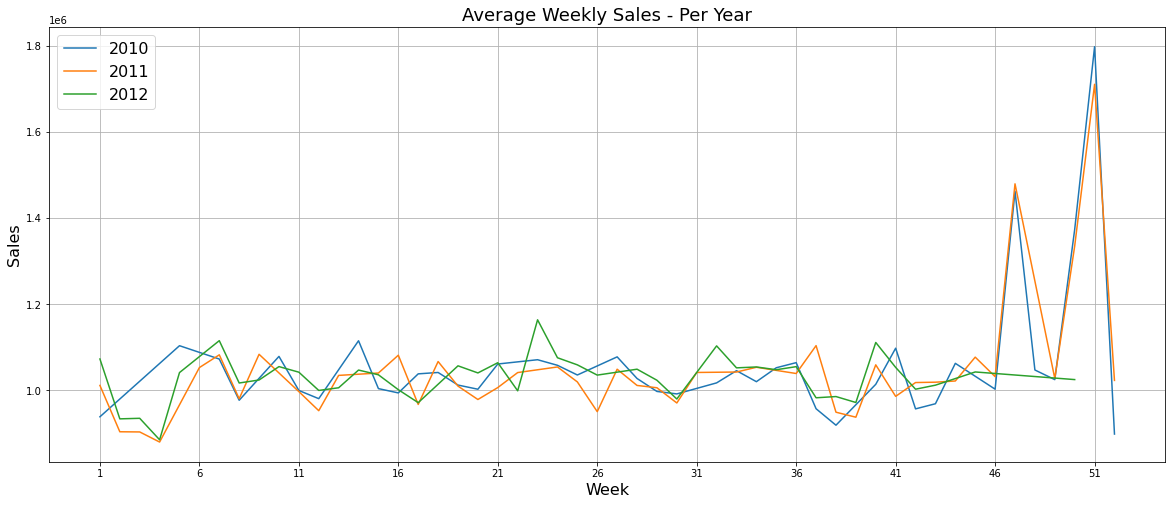

In [16]:
weekly_sales_2010 = df[df.Year==2010]['Weekly_Sales'].groupby(df['Week']).mean()
weekly_sales_2011 = df[df.Year==2011]['Weekly_Sales'].groupby(df['Week']).mean()
weekly_sales_2012 = df[df.Year==2012]['Weekly_Sales'].groupby(df['Week']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=5))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

1)Q)If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

In [17]:
import plotly.express as px
palette = px.colors.qualitative.Safe
px.histogram(df, x='Store', y ='Weekly_Sales', opacity= 0.8,nbins=30, barmode='relative',
             title='Unemployment rate and sales by store',color_discrete_sequence=palette)
plt.show()

Yes,the weekly sales are affected by the unemployment rate.
The stores which are suffering the most are 
Store 28,33,38 and 44

2)Q)If the weekly sales show a seasonal trend, when and what could be the reason?

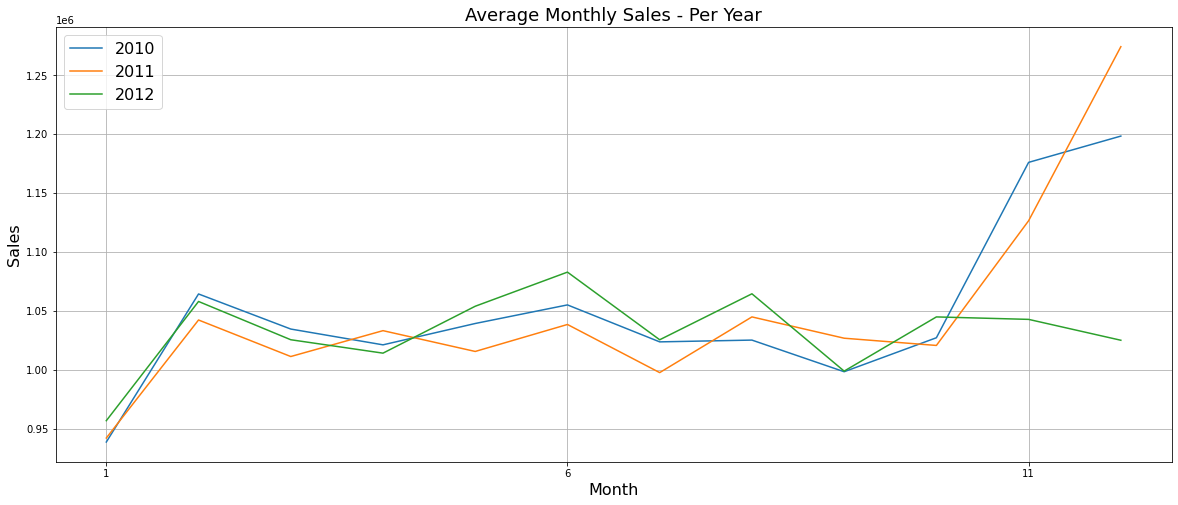

In [19]:
weekly_sales_2010 = df[df.Year==2010]['Weekly_Sales'].groupby(df['Month']).mean()
weekly_sales_2011 = df[df.Year==2011]['Weekly_Sales'].groupby(df['Month']).mean()
weekly_sales_2012 = df[df.Year==2012]['Weekly_Sales'].groupby(df['Month']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1, 13, step=5))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Monthly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.show()

From the above we can clearly observe that sessonal trend; it is around 6th month and year end like in December month the sales are high.May be due to festival seasons like Christmas or new year.

**Let us check other featues too w.r .t weekly_Sales

In [19]:
def scatter(df, column):
    plt.figure()
    plt.scatter(df[column] , df['Weekly_Sales'])
    plt.ylabel('Weekly Sales')
    plt.xlabel(column)

In [20]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Week', 'Month', 'Year'],
      dtype='object')

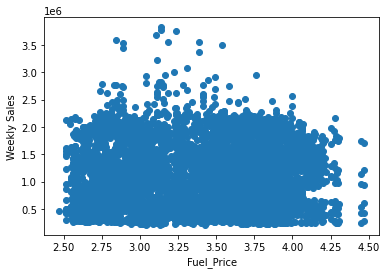

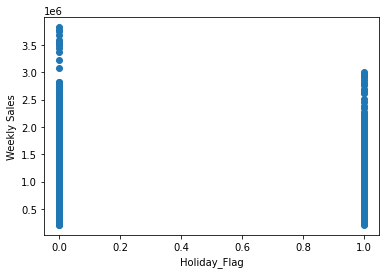

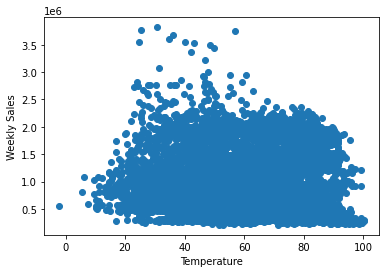

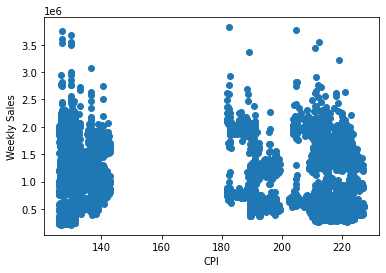

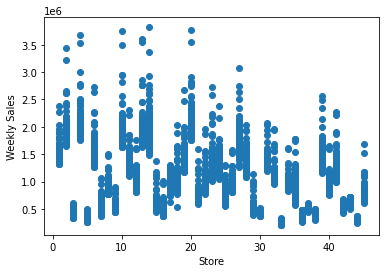

In [21]:
scatter(df, 'Fuel_Price')
scatter(df, 'Holiday_Flag')
scatter(df, 'Temperature')
scatter(df, 'CPI')
scatter(df, 'Store')


3)Q)c. Does temperature affect the weekly sales in any manner?

In [21]:
px.histogram(df, x='Temperature', y ='Weekly_Sales', marginal='box')

In [23]:
px.histogram(df, x='Temperature', y ='Weekly_Sales', color='Holiday_Flag', marginal='box')

yes, definitely temparature affect the weekly sales

4)Q)d. How is the Consumer Price index affecting the weekly sales of various stores?

In [22]:
px.histogram(df, x='CPI', y ='Weekly_Sales', color='Store')

 When there is an upward change in the CPI, this means there has been an increase in the average change in prices over time.Change in the CPI, this means there has been an increase in the average change in prices over time.

#Let us check the correlation among various features

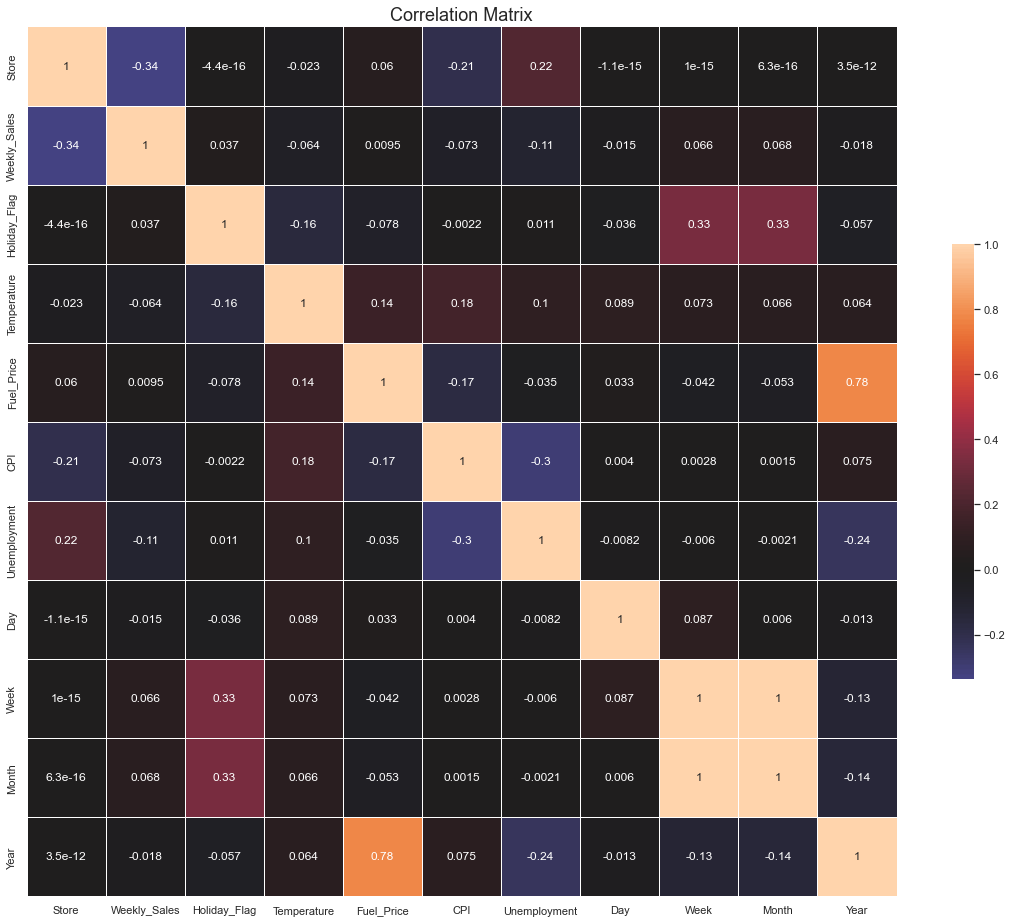

In [24]:
sns.set(style="white")
corr = df.corr()
f, ax = plt.subplots(figsize=(20, 16))
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()


In [25]:
Unemployment = df['Unemployment'].groupby(df['Store']).mean()
Unemployment

Store
1      7.610420
2      7.623846
3      7.176986
4      5.964692
5      6.295406
6      6.606902
7      8.585734
8      6.091846
9      6.099881
10     8.362965
11     7.176986
12    13.116483
13     7.001825
14     8.648748
15     7.996252
16     6.477993
17     6.549406
18     8.838301
19     7.996252
20     7.371413
21     7.623846
22     8.069371
23     4.796014
24     8.447014
25     7.371413
26     7.872070
27     8.001748
28    13.116483
29     9.806385
30     7.623846
31     7.623846
32     8.585734
33     8.533154
34     9.934804
35     8.788573
36     7.869049
37     7.869049
38    13.116483
39     7.869049
40     4.796014
41     6.973378
42     8.362965
43     9.934804
44     6.735622
45     8.648748
Name: Unemployment, dtype: float64

In [26]:
px.histogram(df, x='Temperature', y ='Weekly_Sales', marginal='box')

In [32]:
px.histogram(df, x='CPI', y ='Weekly_Sales', color='Store')


In [33]:
df = df.drop(['Date'], axis=1)

Text(0, 0.5, 'Weekly_Sales')

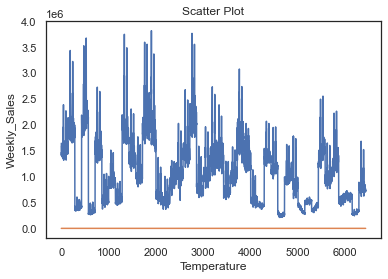

In [27]:
plt.plot(df['Weekly_Sales'])
plt.plot(df['Temperature'])
plt.title("Scatter Plot")
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')

yes, definitely temparature affect the weekly sales.There is a clear variation between weekly sales as the temparature goes high.

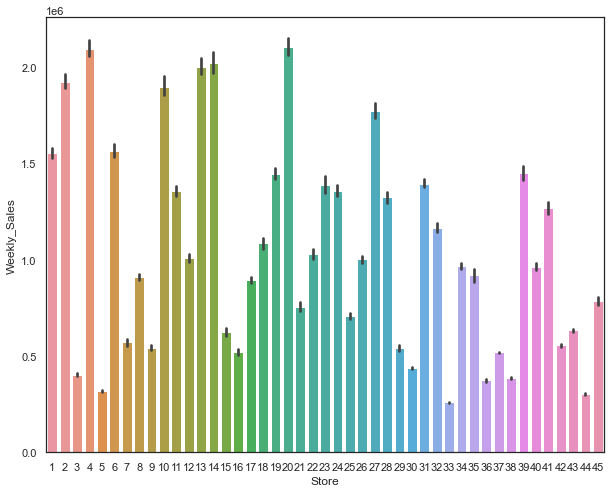

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(x='Store', y='Weekly_Sales', data=df,)
plt.show()

From the above bar graph it is clearly evident that, the least peforming store would be store number 33 and the highest performing store would be store nmber 20.

In [31]:
df2=pd.read_csv("Walmart DataSet.csv")
df2.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [35]:
# Converting date column to datetime 
df2['Date'] = pd.to_datetime(df2['Date'])

#Store 24

In [112]:
#df2.set_index('Date', inplace=True)

store1 = df2[df2.Store == 20]
# there are about 45 different stores in this dataset.

sales1 = pd.DataFrame(store1.Weekly_Sales.groupby(store1.index).sum())
sales1.dtypes
sales1.head(20)
# Grouped weekly sales by store 20

#remove date from index to change its dtype because it clearly isnt acceptable.
sales1.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales1['Date'] = pd.to_datetime(sales1['Date'])
# resetting date back to the index
sales1.set_index('Date',inplace = True)


#Store6

In [126]:
#df2.set_index('Date', inplace=True)

store2 = df2[df2.Store == 33]
# there are about 45 different stores in this dataset.

sales2 = pd.DataFrame(store2.Weekly_Sales.groupby(store2.index).sum())
sales2.dtypes
sales2.head(20)
# Grouped weekly sales by store 33

#remove date from index to change its dtype because it clearly isnt acceptable.
sales2.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales2['Date'] = pd.to_datetime(sales2['Date'])
# resetting date back to the index
sales2.set_index('Date',inplace = True)

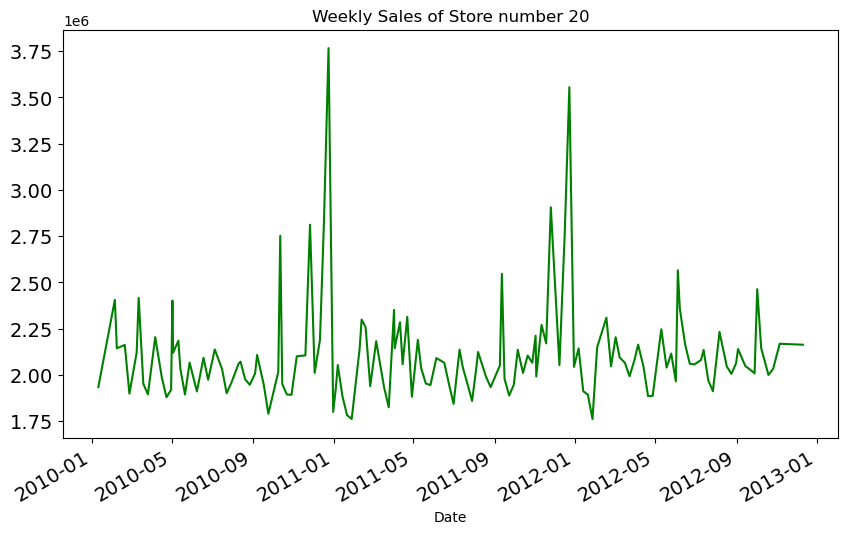

In [122]:
sales1.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of Store number 20', fontsize=14, color = 'green')
plt.show()

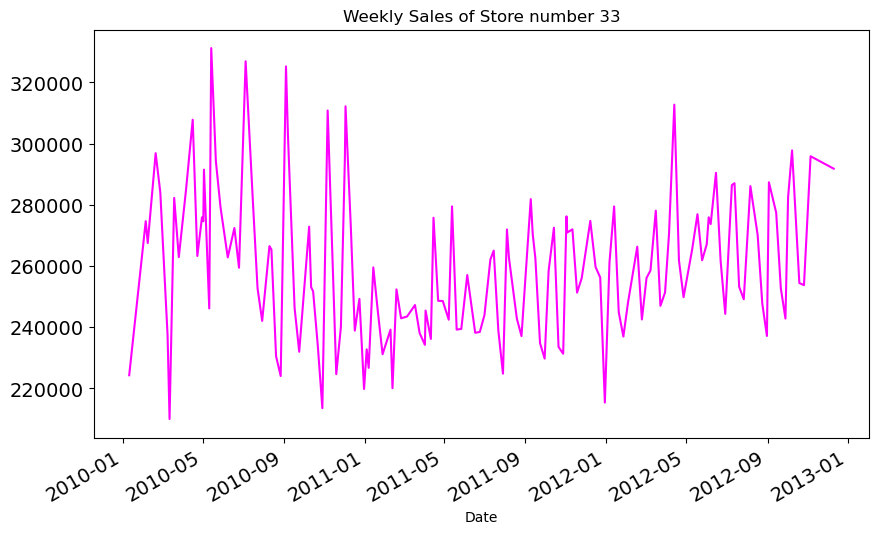

In [127]:
sales2.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of Store number 33', fontsize=14, color = 'magenta')
plt.show()

From the above we can clearly say that the weekly sales showing  a seasonal trend.

<Figure size 640x480 with 0 Axes>

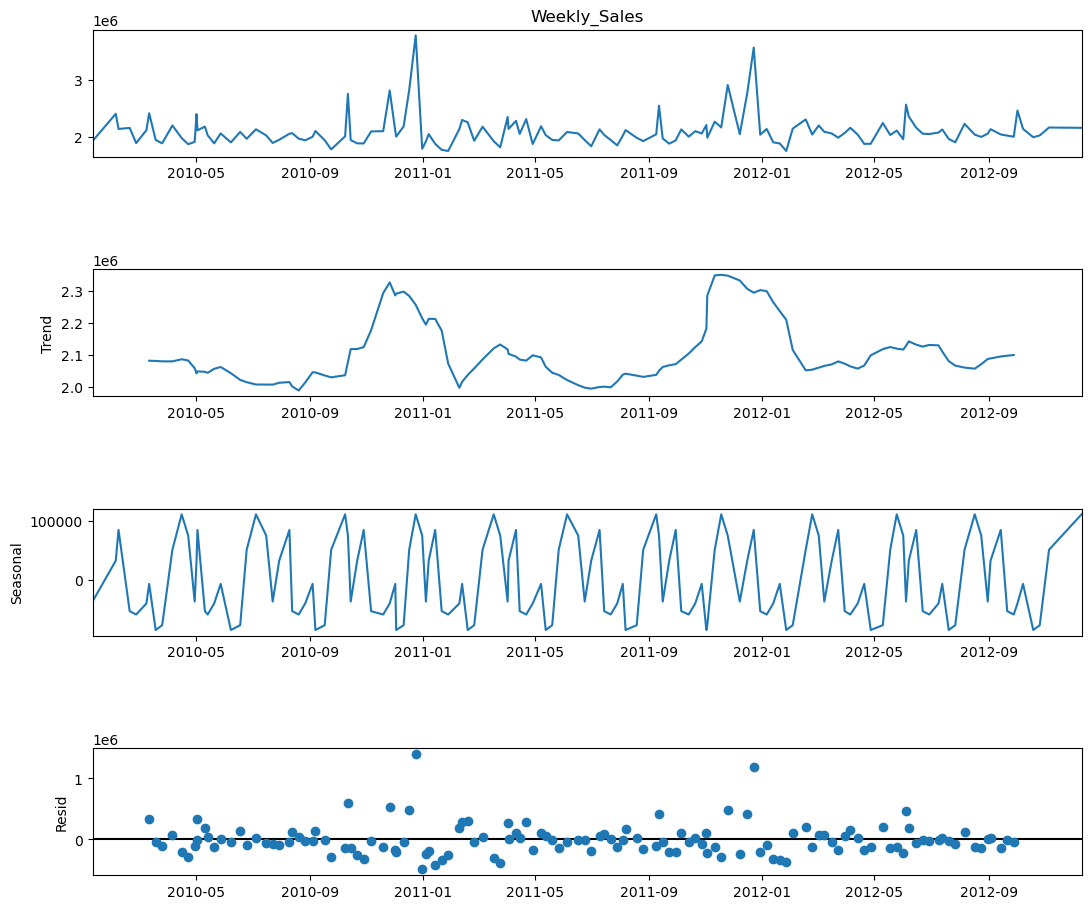

In [128]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales1.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

<Figure size 640x480 with 0 Axes>

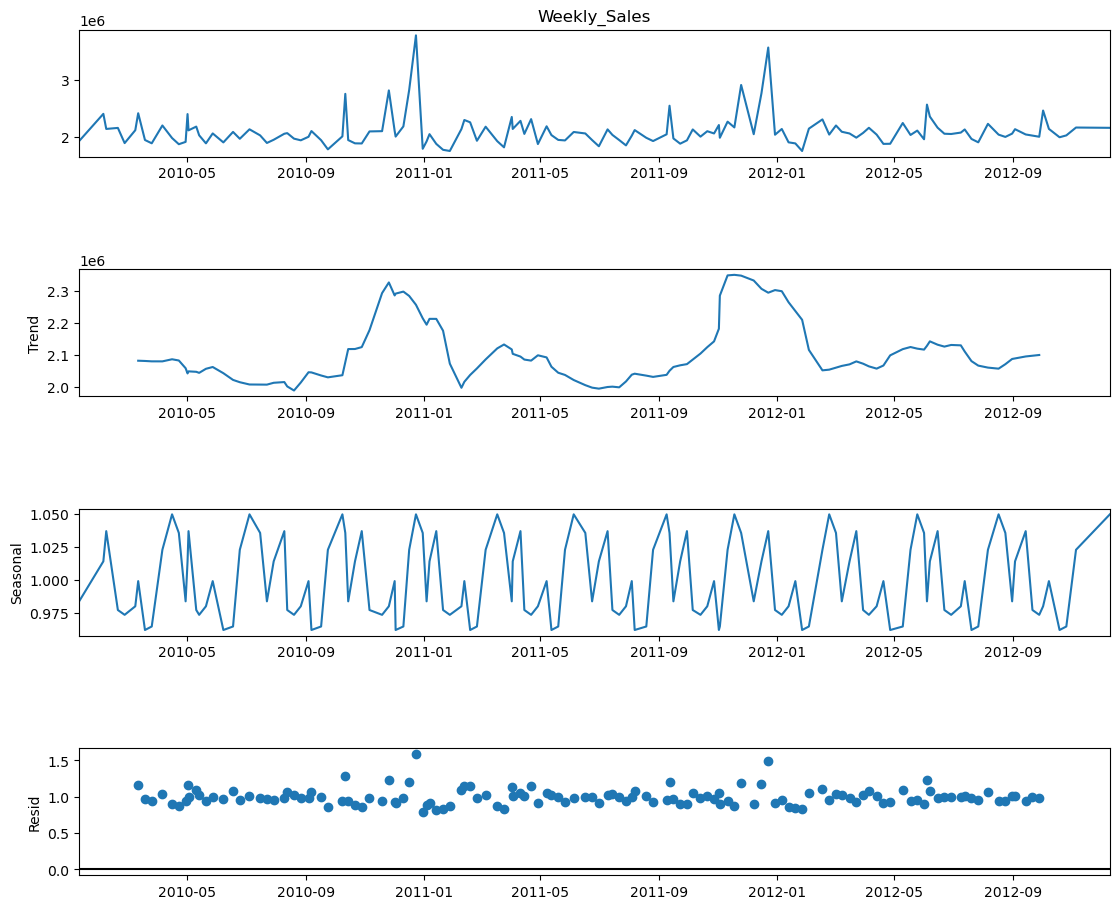

In [117]:
decomposition = seasonal_decompose(sales1.Weekly_Sales, model= 'multiplicative', period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

<Figure size 640x480 with 0 Axes>

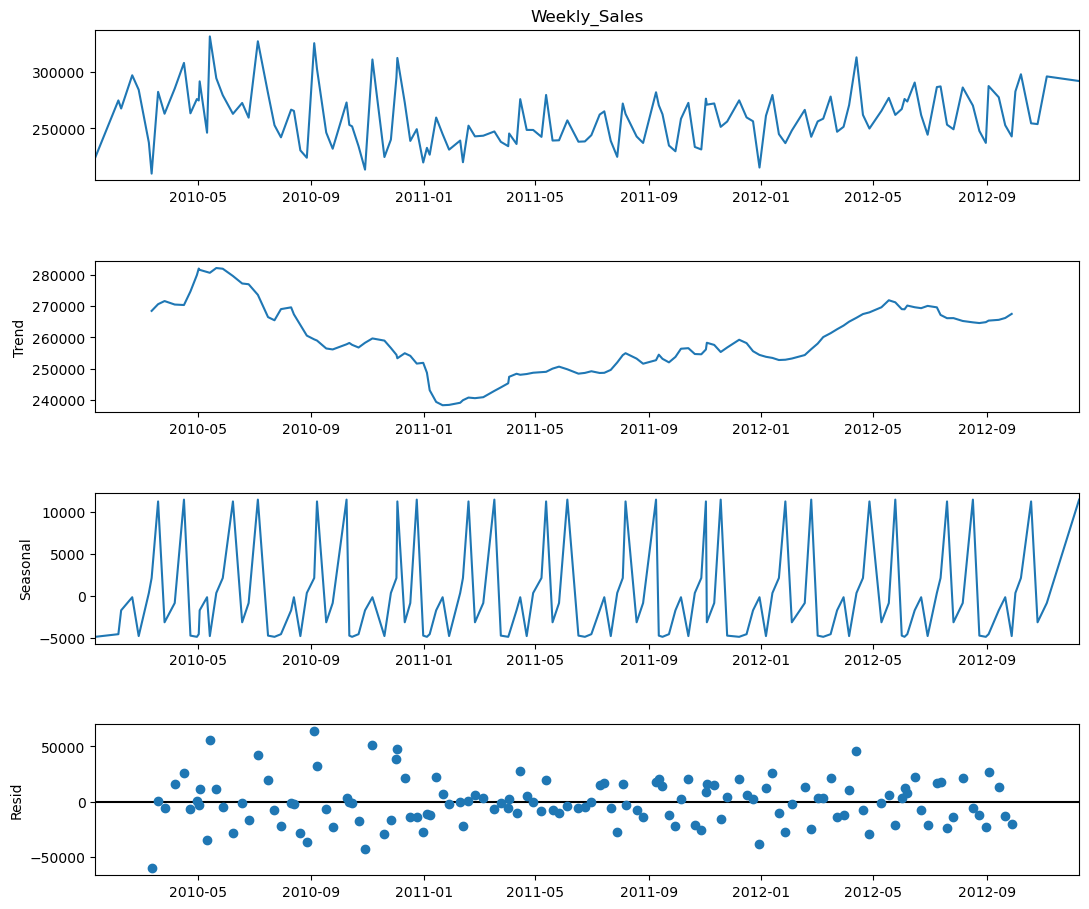

In [129]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales2.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

<Figure size 640x480 with 0 Axes>

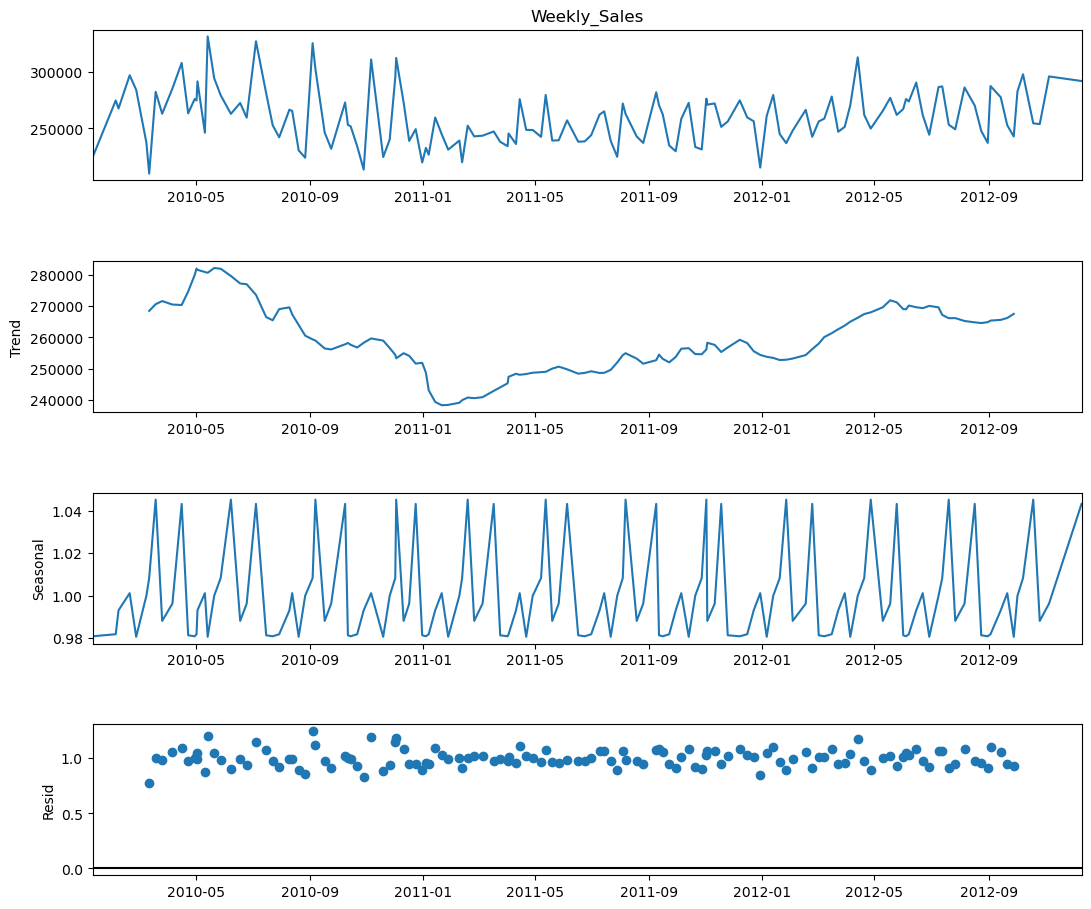

In [130]:
decomposition = seasonal_decompose(sales2.Weekly_Sales, model= 'multiplicative', period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [131]:
y1=sales1.Weekly_Sales
y2=sales2.Weekly_Sales

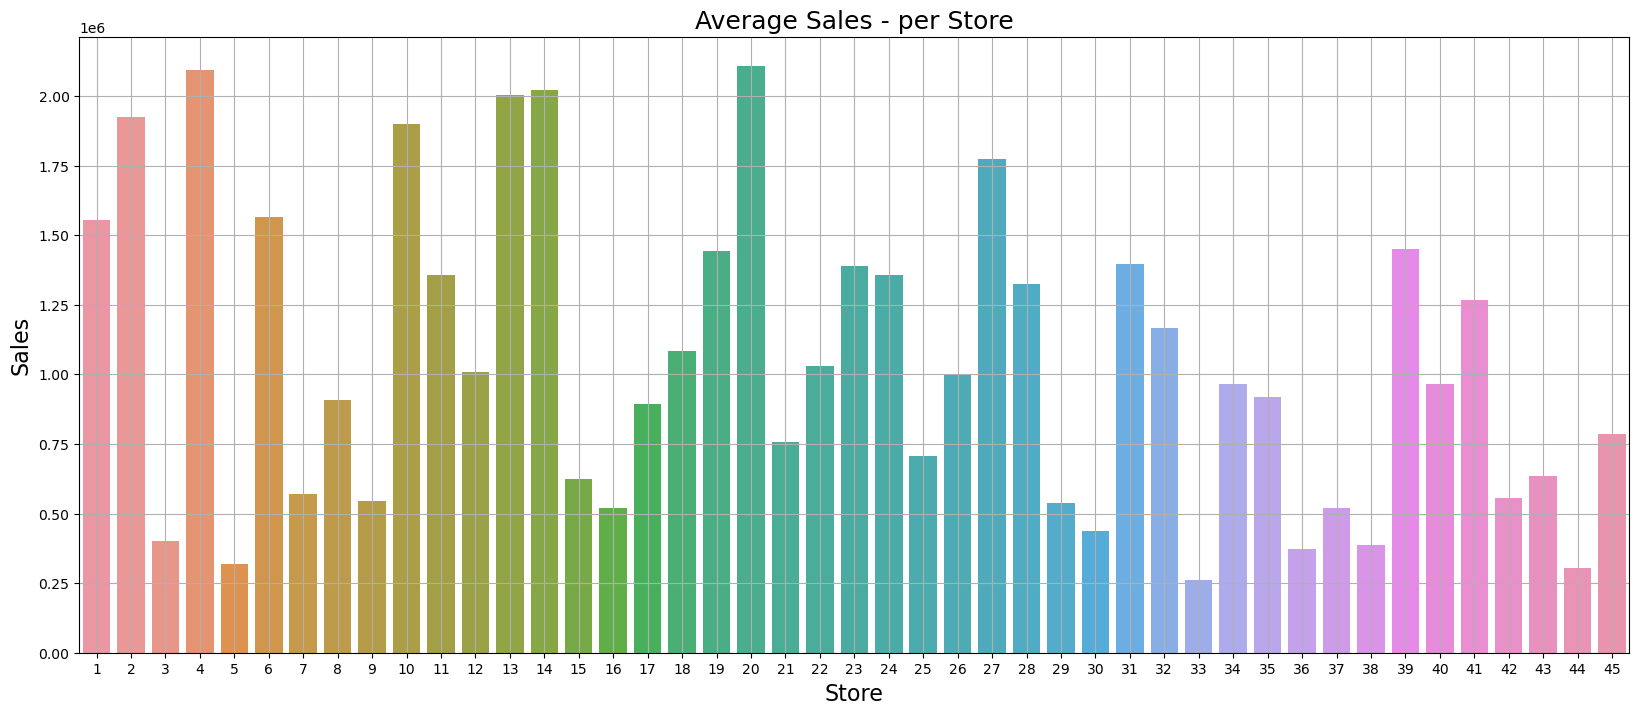

In [95]:
weekly_sales = df2['Weekly_Sales'].groupby(df2['Store']).mean()
plt.figure(figsize=(20,8))
plt.style.use('default')
sns.barplot(weekly_sales.index, weekly_sales.values)
plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

***Top performing Stores according to avg weekly sales****

In [55]:
weekly_sales = df2['Weekly_Sales'].groupby(df2['Store']).mean()
weekly_sales=weekly_sales.astype(int)
weekly_sales
d1 = weekly_sales.nlargest(5, 'first')
d1

Store
20    2107676
4     2094712
14    2020978
13    2003620
2     1925751
Name: Weekly_Sales, dtype: int32

***The worst performing Stores according to avg weekly sales****

In [56]:
weekly_sales = df2['Weekly_Sales'].groupby(df2['Store']).mean()
weekly_sales=weekly_sales.astype(int)
weekly_sales
d2 = weekly_sales.nsmallest(5, 'first')
d2

Store
33    259861
44    302748
5     318011
36    373511
38    385731
Name: Weekly_Sales, dtype: int32

In [57]:
d1 = weekly_sales.nlargest(1, 'first')
d1


Store
20    2107676
Name: Weekly_Sales, dtype: int32

In [58]:
d2 = weekly_sales.nsmallest(1, 'first')
d2

Store
33    259861
Name: Weekly_Sales, dtype: int32

In [59]:
#Simply subtract d1-d2 gives the diiference between the highest and lowest performing stores weekly sales.
2107676-259861

1847815

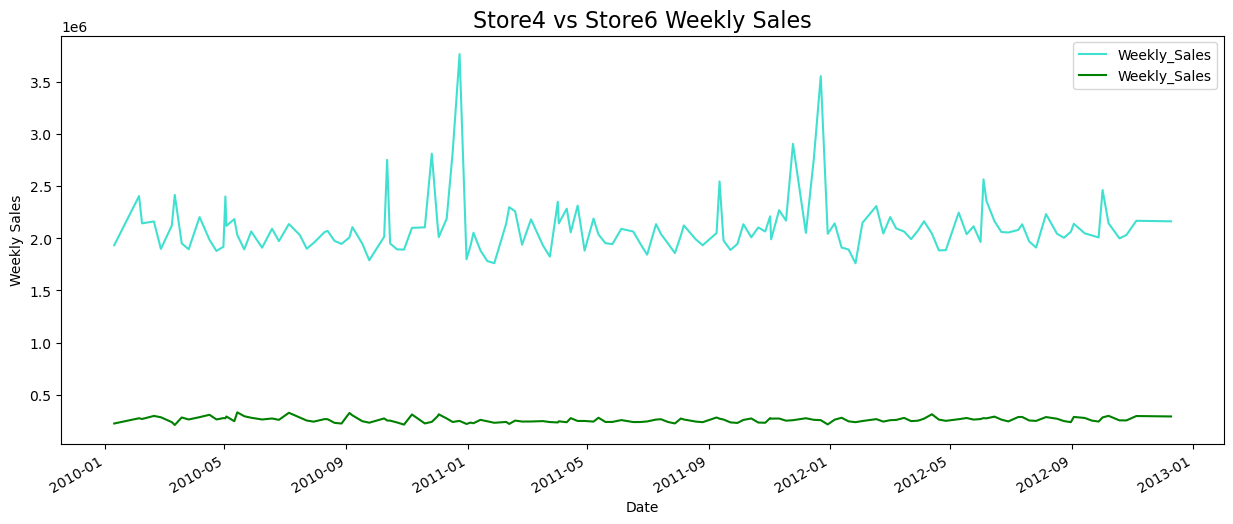

In [132]:
y1.plot(figsize=(15, 6), legend=True, color = 'turquoise')
y2.plot(figsize=(15, 6), legend=True, color = 'green')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store6 Weekly Sales', fontsize = '16')
plt.show()

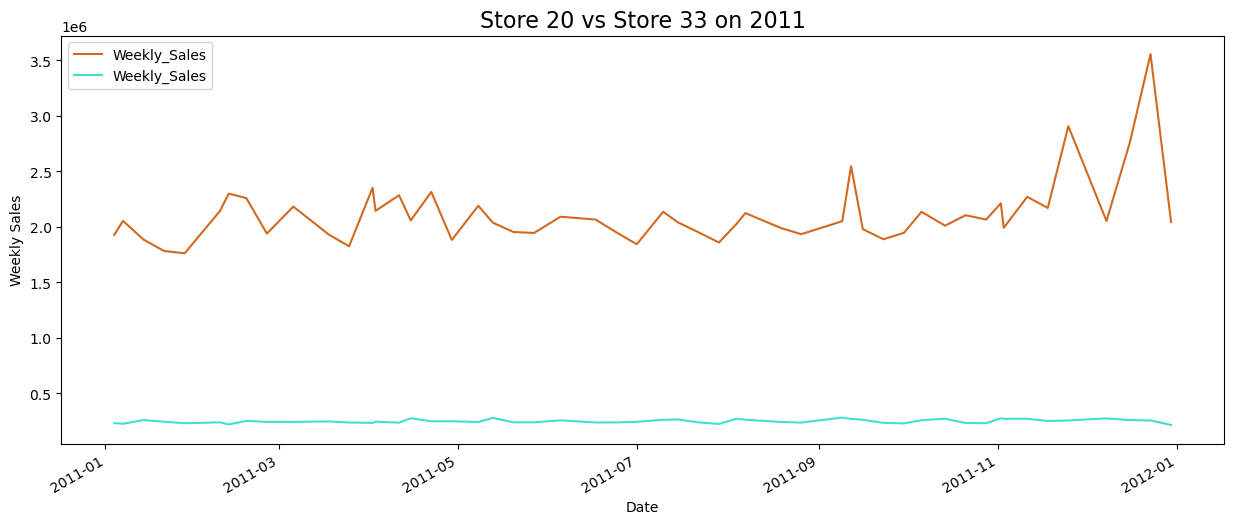

In [134]:
# Lets Look into 2012 data for a better view
y1['2011'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2011'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store 20 vs Store 33 on 2011', fontsize = '16')
plt.show()

# **TIME SERIES ANALYSIS

In [60]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)
import itertools
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 52),
 (0, 0, 1, 52),
 (0, 0, 2, 52),
 (0, 0, 3, 52),
 (0, 0, 4, 52),
 (0, 1, 0, 52),
 (0, 1, 1, 52),
 (0, 1, 2, 52),
 (0, 1, 3, 52),
 (0, 1, 4, 52),
 (0, 2, 0, 52),
 (0, 2, 1, 52),
 (0, 2, 2, 52),
 (0, 2, 3, 52),
 (0, 2, 4, 52),
 (0, 3, 0, 52),
 (0, 3, 1, 52),
 (0, 3, 2, 52),
 (0, 3, 3, 52),
 (0, 3, 4, 52),
 (0, 4, 0, 52),
 (0, 4, 1, 52),
 (0, 4, 2, 52),
 (0, 4, 3, 52),
 (0, 4, 4, 52),
 (1, 0, 0, 52),
 (1, 0, 1, 52),
 (1, 0, 2, 52),
 (1, 0, 3, 52),
 (1, 0, 4, 52),
 (1, 1, 0, 52),
 (1, 1, 1, 52),
 (1, 1, 2, 52),
 (1, 1, 3, 52),
 (1, 1, 4, 52),
 (1, 2, 0, 52),
 (1, 2, 1, 52),
 (1, 2, 2, 52),
 (1, 2, 3, 52),
 (1, 2, 4, 52),
 (1, 3, 0, 52),
 (1, 3, 1, 52),
 (1, 3, 2, 52),
 (1, 3, 3, 52),
 (1, 3, 4, 52),
 (1, 4, 0, 52),
 (1, 4, 1, 52),
 (1, 4, 2, 52),
 (1, 4, 3, 52),
 (1, 4, 4, 52),
 (2, 0, 0, 52),
 (2, 0, 1, 52),
 (2, 0, 2, 52),
 (2, 0, 3, 52),
 (2, 0, 4, 52),
 (2, 1, 0, 52),
 (2, 1, 1, 52),
 (2, 1, 2, 52),
 (2, 1, 3, 52),
 (2, 1, 4, 52),
 (2, 2, 0, 52),
 (2, 2, 1, 52),
 (2, 2, 

In [135]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\ysadmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\ysadmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\ysadmin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6308      0.737     -2.211      0.027      -3.076      -0.185
ar.L2         -1.5329      0.769     -1.993      0.046      -3.041      -0.025
ar.L3         -1.0775      0.641     -1.682      0.093      -2.333       0.178
ar.L4         -0.4487      0.364     -1.234      0.217      -1.161       0.264
ma.L1         -1.4122      0.812     -1.740      0.082      -3.003       0.179
ma.L2         -0.1295      1.557     -0.083      0.934      -3.181       2.922
ma.L3          0.5483      0.802      0.683      0.494      -1.024       2.121
ar.S.L52      -0.4362      0.181     -2.412      0.016      -0.791      -0.082
sigma2      2.407e+11   1.23e-11   1.95e+22      0.000    2.41e+11    2.41e+11


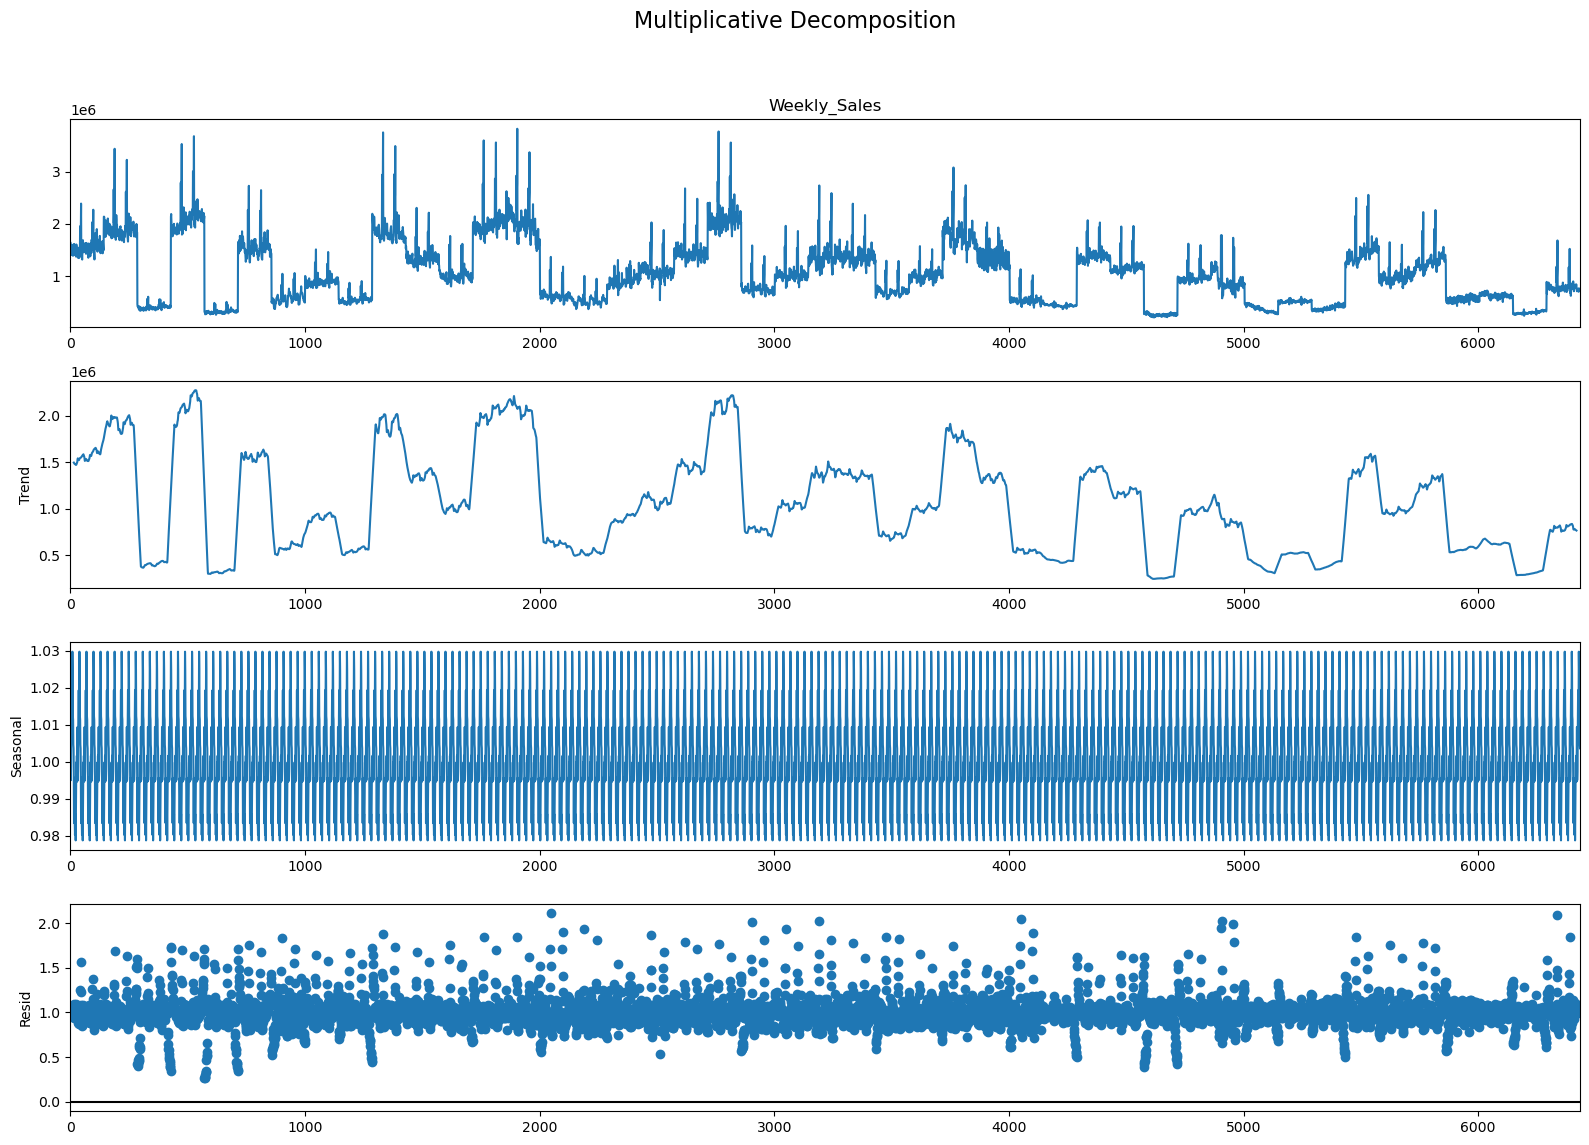

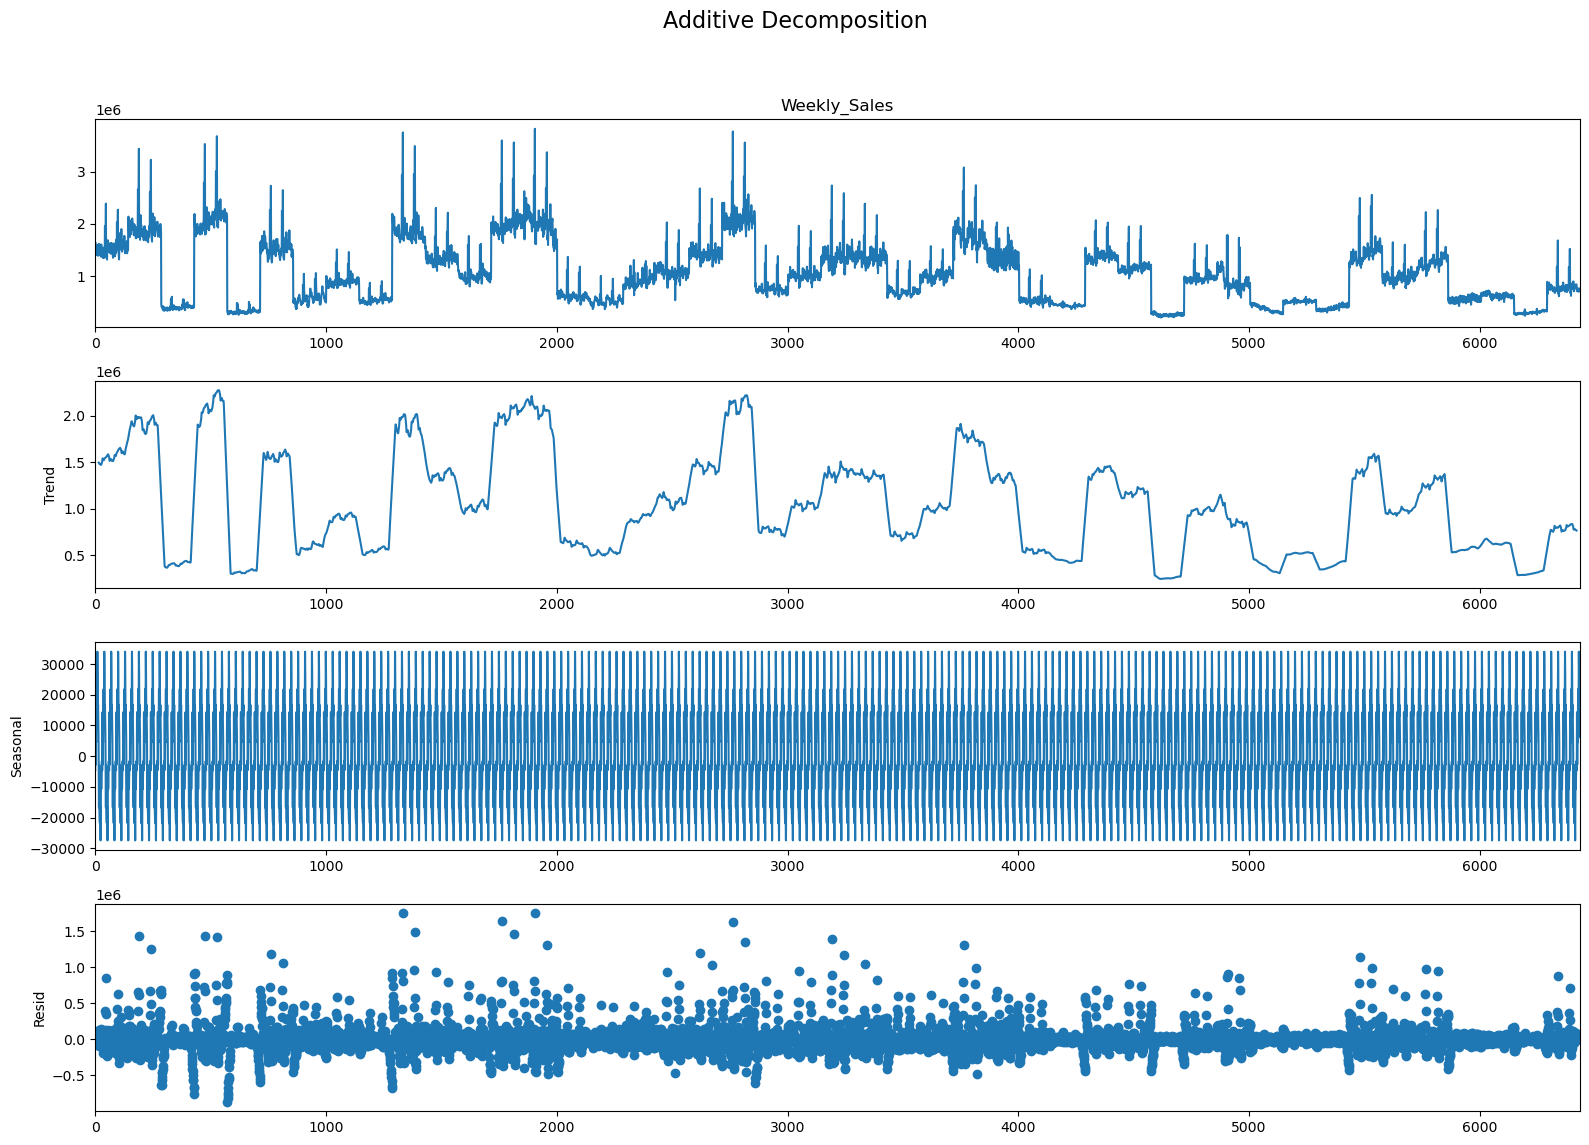

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Weekly_Sales'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Weekly_Sales'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

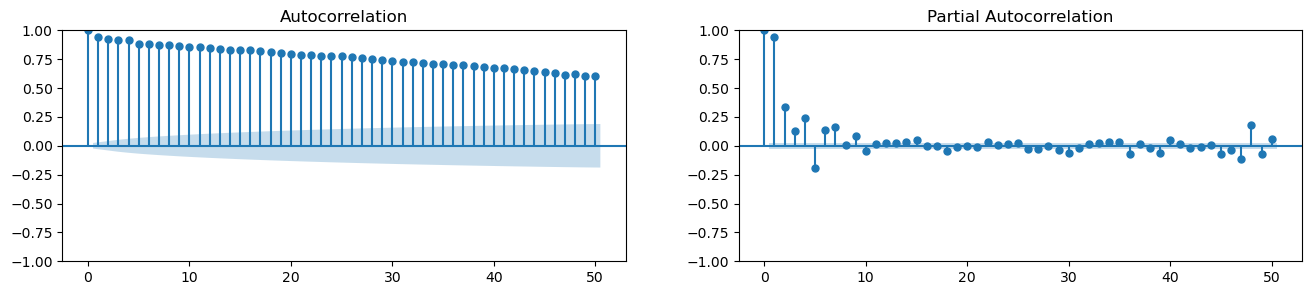

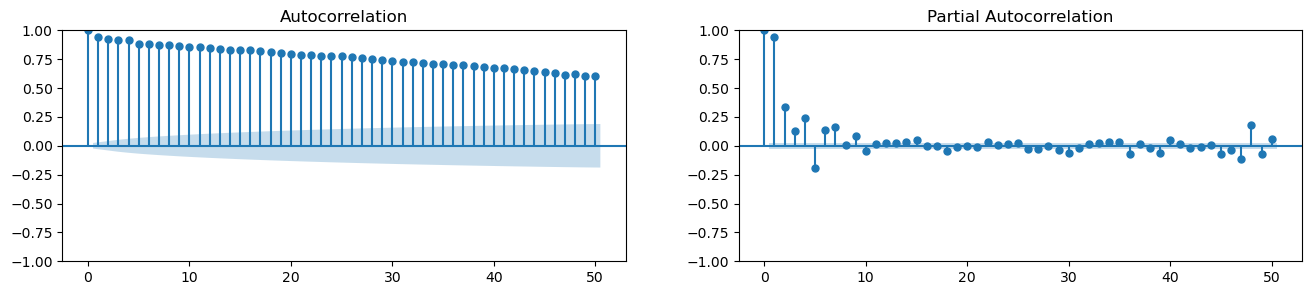

In [76]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Weekly_Sales'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Weekly_Sales'].tolist(), lags=50, ax=axes[1])

In [136]:
# Will predict for last 90 days. So setting the date according to that
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

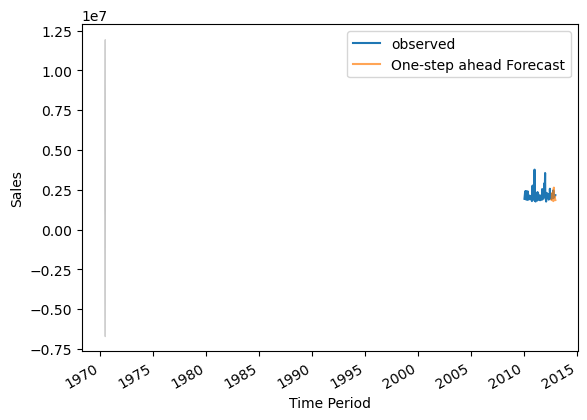

In [144]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [145]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-07-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 94470031958.05


In [146]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

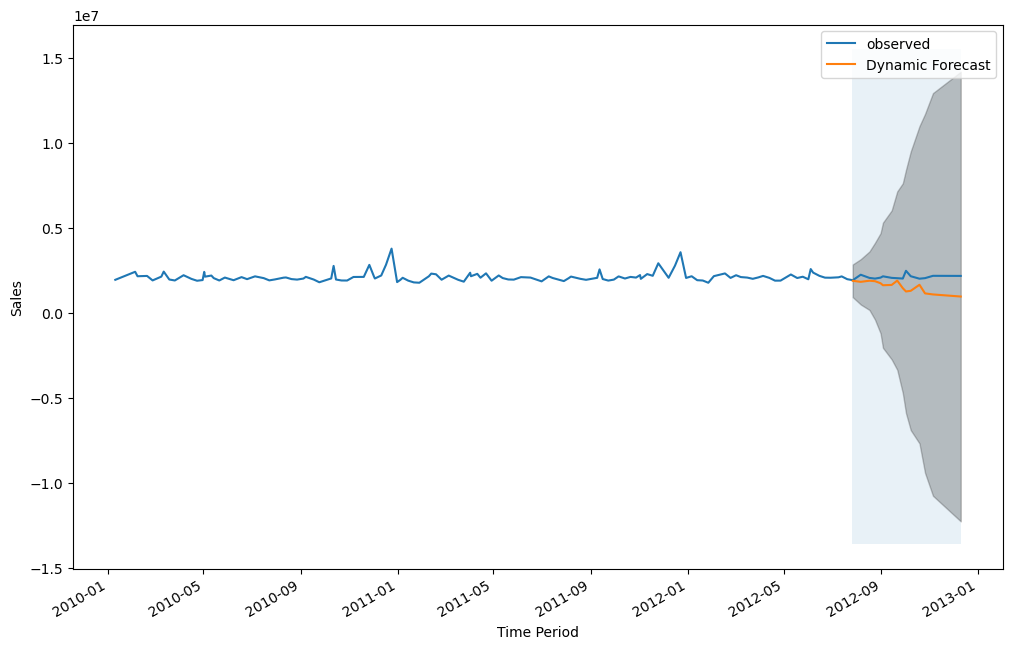

In [147]:
ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

That looks good. Both the observed and predicted lines go together indicating nearly accurate prediction.


In [148]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean

y_truth = y1['2012-7-27':]

# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 679764.14


In [149]:
Residual= y_forecasted - y_truth
print("Residual for Store6",np.abs(Residual).sum())

Residual for Store6 8381385.756682847


In [150]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

C:\Users\ysadmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



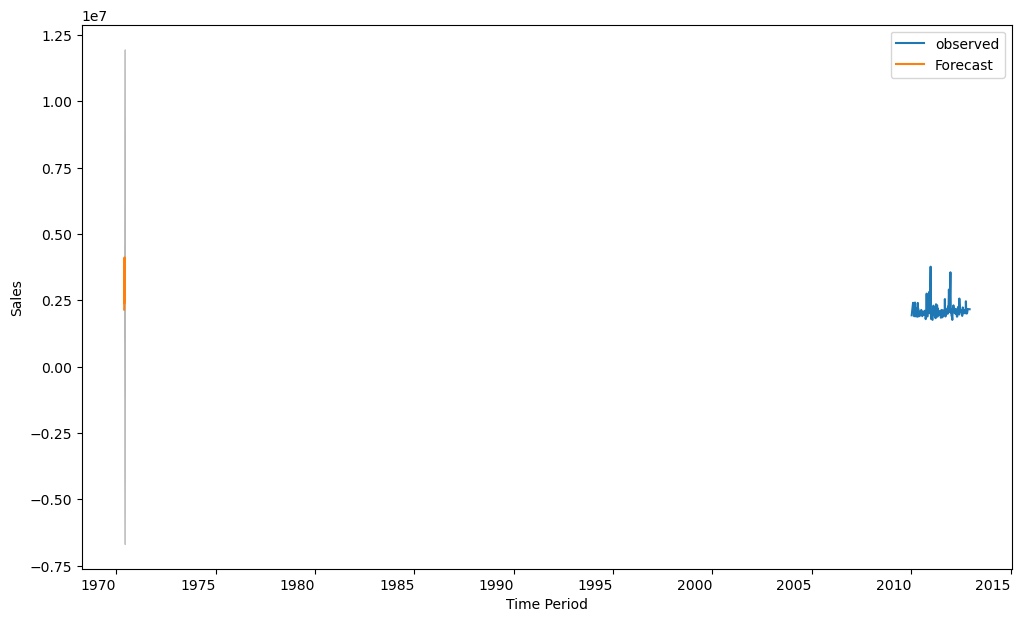

In [151]:
ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

For future prediction the model is not that great because the error interval is way big. But if we just check the green line prediction this is almost like earlier years. If we look for may be first 2 weeks the prediction is way better and error is also low.

# Plotting data

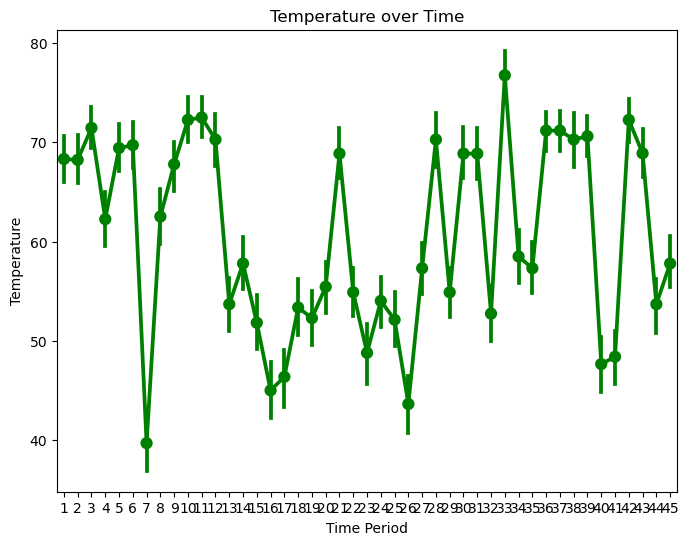

In [152]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Store", y="Temperature", data=df2, color = 'green')
plt.xlabel('Time Period')
plt.ylabel('Temperature')
plt.title('Temperature over Time')
plt.show()

inference: Graph clearly shows Temperature is more of a seasonal and repeated in cycles and this would 
be an interesting data point that we can use for studies further

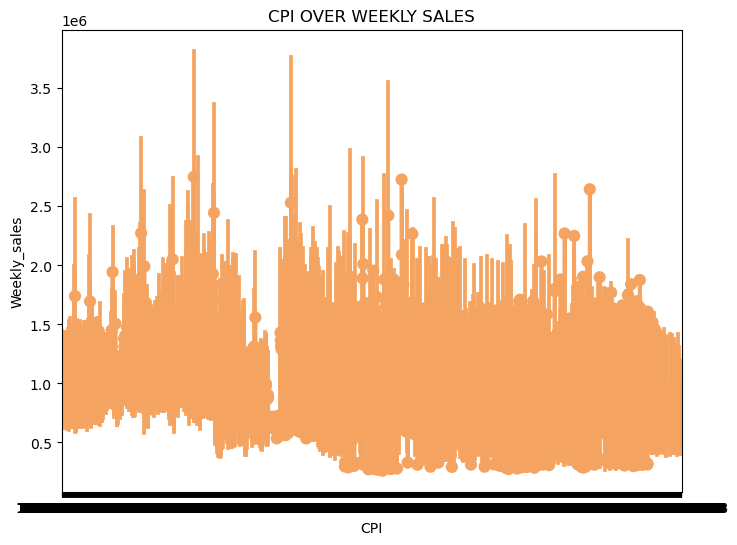

In [100]:
plt.figure(figsize=(8,6))
sns.pointplot(x="CPI", y="Weekly_Sales", data=df2, color = 'sandybrown')
plt.xlabel('CPI')
plt.ylabel('Weekly_sales')
plt.title('CPI OVER WEEKLY SALES')
plt.show()
# inference: Fuel price varies over time and there are high and lows

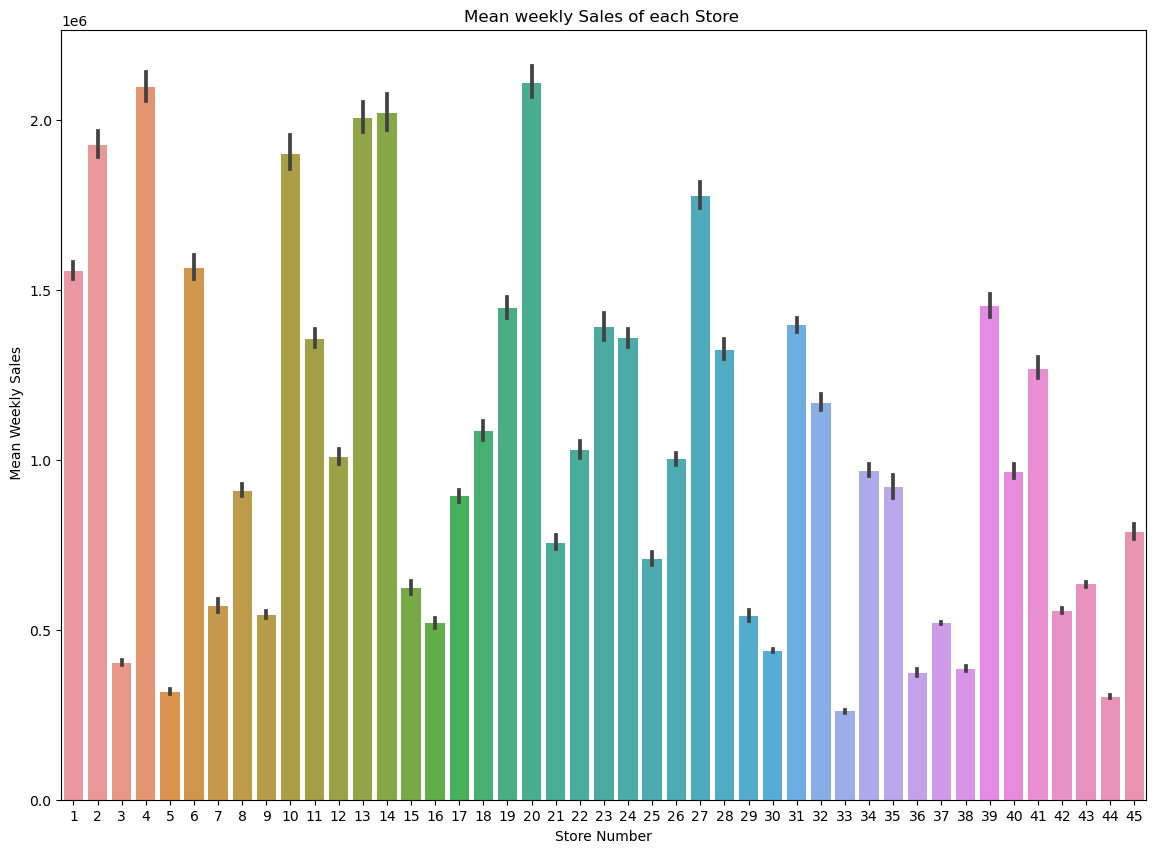

In [101]:
plt.subplots(figsize=(14,10))
sns.barplot(x="Store", y="Weekly_Sales", data=df2,orient='v')
plt.xlabel('Store Number')
plt.ylabel(' Mean Weekly Sales')
plt.title('Mean weekly Sales of each Store ')
#plt.savefig('./images/Mean_Weekly_Sales_vs_Stores.png')
plt.show()

inference : From the chart we can see that there are stores that have a weekly sales from $250,000 to $2,200,000

In [103]:
df2.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-05-02      1    1643690.90             0        42.31       2.572   
2010-12-02      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-05-03      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-05-02  211.096358         8.106  
2010-12-02  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-05-03  211.350143         8.106

Feature Engineering and Visualization of Statistical analysis

In [119]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [153]:
df.iloc[:,5:10].describe().T

# Inference: more than 50% is missing values with (-500) so imputing with KNN might not be a good idea. 
# But what are the other methods? imputing with random values in the range of that particular columns?
# Lets try that first.

count        mean        std      min      25%         50%  \
CPI           6435.0  171.578394  39.356712  126.064  131.735  182.616521   
Unemployment  6435.0    7.999151   1.875885    3.879    6.891    7.874000   

                     75%         max  
CPI           212.743293  227.232807  
Unemployment    8.622000   14.313000

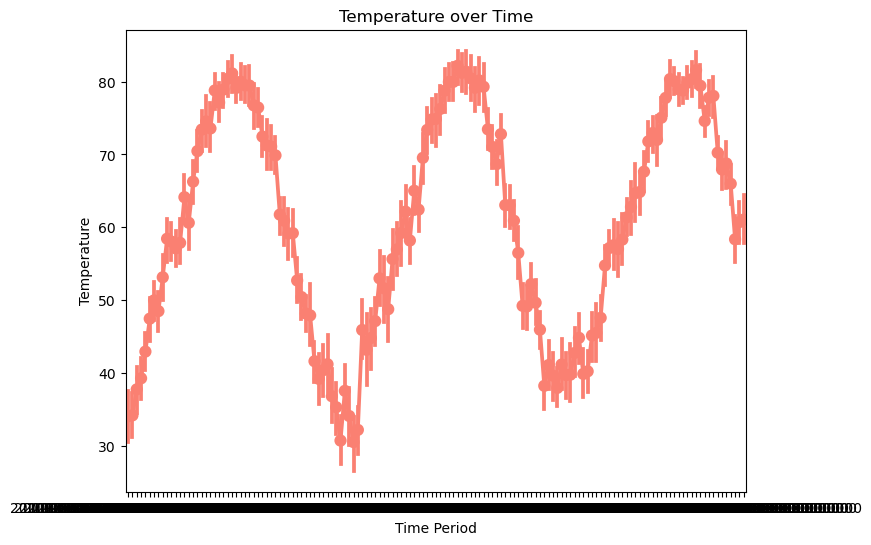

In [156]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="Temperature", data=df, color = 'salmon')
plt.xlabel('Time Period')
plt.ylabel('Temperature')
plt.title('Temperature over Time')
plt.show()
# inference: Graph clearly shows Temperature is more of a seasonal and repeated in cycles and this would 
# be an interesting data point that we can use for studies further

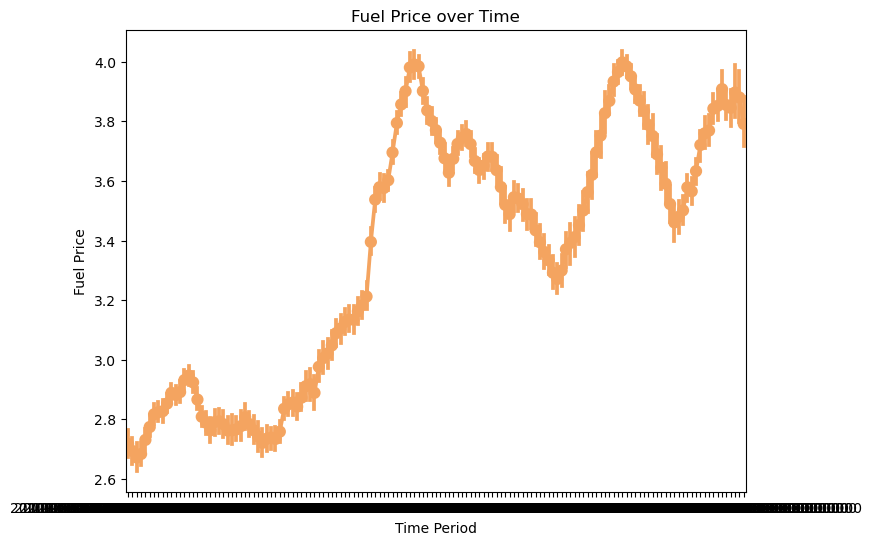

In [157]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="Fuel_Price", data=df, color = 'sandybrown')
plt.xlabel('Time Period')
plt.ylabel('Fuel Price')
plt.title('Fuel Price over Time')
plt.show()
# inference: Fuel price varies over time and there are high and lows

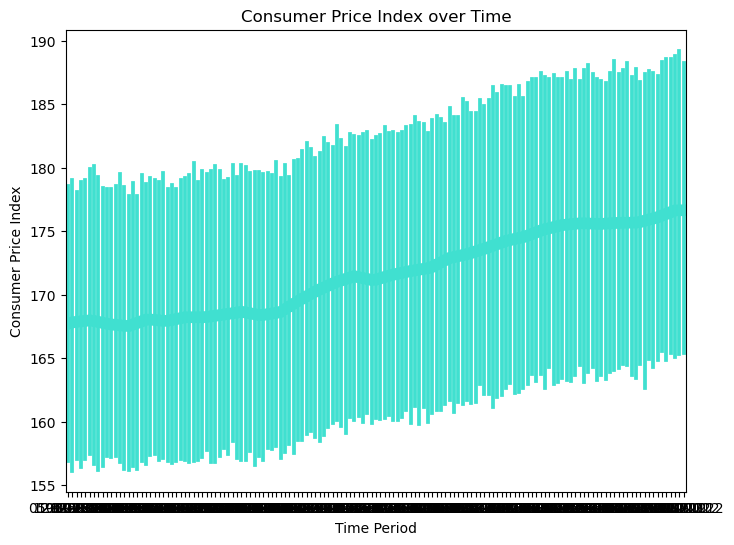

In [116]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="CPI", data=df, color = 'turquoise')
plt.xlabel('Time Period')
plt.ylabel('Consumer Price Index')
plt.title('Consumer Price Index over Time')
plt.show()
# inference: over time CPI have increased. but the change is not much


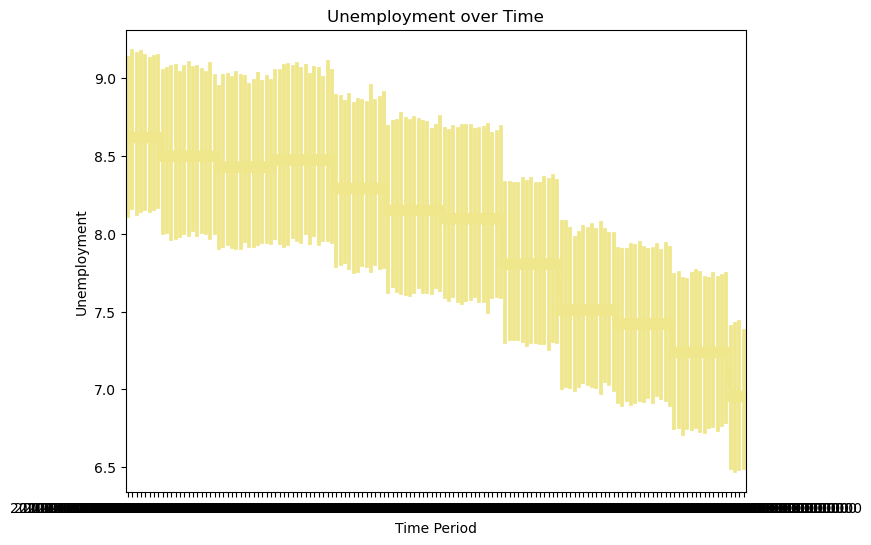

In [158]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="Unemployment", data=df, color='khaki')
plt.xlabel('Time Period')
plt.ylabel('Unemployment')
plt.title('Unemployment over Time')
plt.show()
# inference:  Over time unemployment have came down we can see this factor also whether it have affected the Sales

#Machine Learning Modelling Techniques

0.12658711849910165
0.15637744823084598
Adjusted R^2 0.12522750940585625
Cross-validated scores: [0.11900189 0.13791529 0.14501756 0.17187066 0.20862056 0.10302435
 0.08100071 0.15476081 0.1747455  0.19883505]
Mean Cross validation 0.14947923794219023


Text(0.5, 1.0, 'Predicted vs Actual Sales')

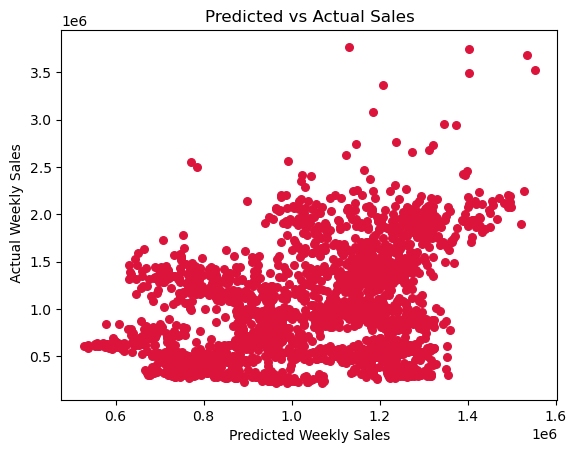

In [159]:
predictors=[col for col in df.columns if col not in ['Date','Weekly_Sales']]
X=df[predictors]
y=df.Weekly_Sales.values 

ss = StandardScaler()
Xs = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.33)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
r2=mlr.score(X_test, y_test)
print(mlr.score(X_test, y_test))
print(mlr.score(X_train, y_train))
adj_r2 = 1 - (len(y)-1)/(len(y)-X.shape[1]-1)*(1-r2)
print("Adjusted R^2",adj_r2)


# Perform 10-fold cross validation
scores = cross_val_score(mlr, X_train, y_train, cv=10)
print ("Cross-validated scores:", scores)
print ("Mean Cross validation",scores.mean())



# Make cross validated predictions on the test sets
predictions = cross_val_predict(mlr, X_test, y_test, cv=10)

plt.scatter(predictions, y_test, s=30, c='crimson', zorder=10)
plt.xlabel('Predicted Weekly Sales')
plt.ylabel(' Actual Weekly Sales')
plt.title('Predicted vs Actual Sales')


0.12778750036663988
0.14470152245271206
Cross-validated scores: [ 0.08789959 -1.55173205 -0.95124726 -0.98397511 -0.30445199 -0.13269224
 -0.16836556 -0.49722795 -0.46503579 -0.81856832]
Mean Cross validation -0.5785396680252037


Text(0.5, 1.0, 'Predicted vs Actual Sales')

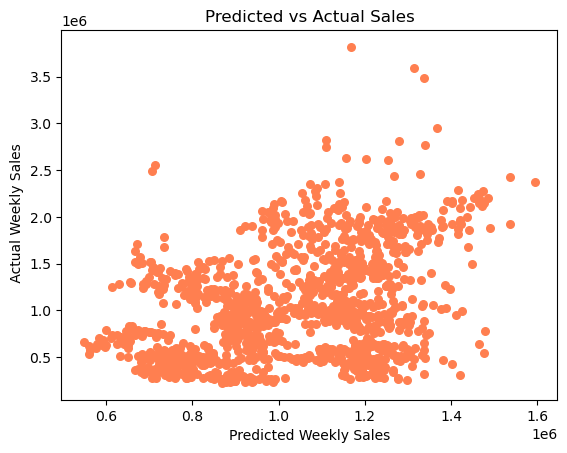

In [127]:
predictors=[col for col in df.columns if col not in ['Date','Weekly_Sales']]
predictors=[col for col in predictors if 'MarkDown' not in col]
X=df[predictors]
y=df.Weekly_Sales.values 
Xs = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))


# Perform 10-fold cross validation
scores = cross_val_score(lr, X, y, cv=10)
print ("Cross-validated scores:", scores)
print ("Mean Cross validation",scores.mean())



# Make cross validated predictions on the test sets
predictions = cross_val_predict(lr, X_test, y_test, cv=10)

plt.scatter(predictions, y_test, s=30, color = 'coral', zorder=10)
plt.xlabel('Predicted Weekly Sales')
plt.ylabel(' Actual Weekly Sales')
plt.title('Predicted vs Actual Sales')

In [160]:
data=df.copy()

In [163]:
# Setting the offset to finalize the test data.
# Import timedelta from datetime library
data['Date'] = pd.to_datetime(data['Date'])
from datetime import timedelta
offset = timedelta(days=90)
split_date=data.Date.max()-offset

In [164]:
data_train=data[data.Date < split_date]
data_test=data[data.Date > split_date]

In [165]:
data_train = data_train.reindex(np.random.permutation(df.index))## Identify outliers

In [166]:
data_train.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Week', 'Month', 'Year'],
      dtype='object')

In [167]:
# Lets consider 3,000,000 as upper limit 
data_train[data_train.Weekly_Sales>3000].shape

(6030, 12)

In [168]:
# there is only 14 outliers. Lets drop it and proceed.
data_train=data_train[data_train.Weekly_Sales<3000]

Improve and Evaluate Model

In [169]:
X=df[predictors]
y=df.Weekly_Sales.values 
Xs = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

In [170]:
print(y_train)

[1015853.03  818434.49  453979.19 ...  746129.56  970641.34  354078.95]


In [171]:
X_train_s=ss.fit_transform(X_train)
X_test_s=ss.fit_transform(X_test)

Random Forest Regressor

In [172]:
rfr=RandomForestRegressor(n_estimators=100, max_depth=None, max_features='auto')

In [174]:
# Fit and crossvalidate on train data
rfr.fit(X_train_s, y_train)
rfr_scores = cross_val_score(rfr, X_train_s, y_train, cv=10)
np.mean(rfr_scores)

0.9578300616718203

In [175]:
rfr_yhat = rfr.predict(X_test_s)
rfr_score=rfr.score(X_test_s, y_test)

print("R2: ",rfr_score)
rfr_adj_r2 = 1 - (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)*(1-rfr_score)
print("Adjusted R2: ",rfr_adj_r2)

R2:  0.8857746707516675
Adjusted R2:  0.8848794879205677


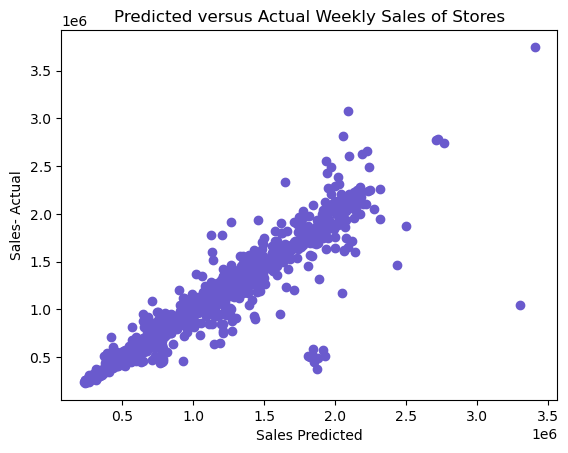

In [176]:
plt.scatter(rfr_yhat, y_test, color='slateblue')
plt.xlabel('Sales Predicted')
plt.ylabel('Sales- Actual')
plt.title('Predicted versus Actual Weekly Sales of Stores')
plt.show()

In [188]:
train_resids = y_train*1000 - rfr.predict(X_train_s)*1000
test_resids = y_test*1000 - rfr_yhat*1000
rfr_residue=np.abs(test_resids).sum()
# Let me look at the actual Residuals.
print("Train Residual",np.abs(train_resids).sum())
print("Test Residual",rfr_residue)
print("Residual ratio of Test to Train",np.abs(test_resids).sum()/np.abs(train_resids).sum())

Train Residual 113841066648.39996
Test Residual 114220902467.60004
Residual ratio of Test to Train 1.0033365448021776


GradientBoostingRegressor

In [177]:
gb = GradientBoostingRegressor(n_estimators=100,max_depth=10,learning_rate=0.1)

In [178]:
gb.fit(X_train_s, y_train)
gb_scores = cross_val_score(gb, X_train_s, y_train, cv=6)
np.mean(gb_scores)

0.9617532550922717

In [179]:
gb_yhat=gb.predict(X_test_s)
gb_score=gb.score(X_test_s,y_test)

print("R2: ",gb_score)
gb_adj_r2 = 1 - (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)*(1-gb_score)
print("Adjusted R2: ",gb_adj_r2)

R2:  0.8787181055435416
Adjusted R2:  0.8777676204772684


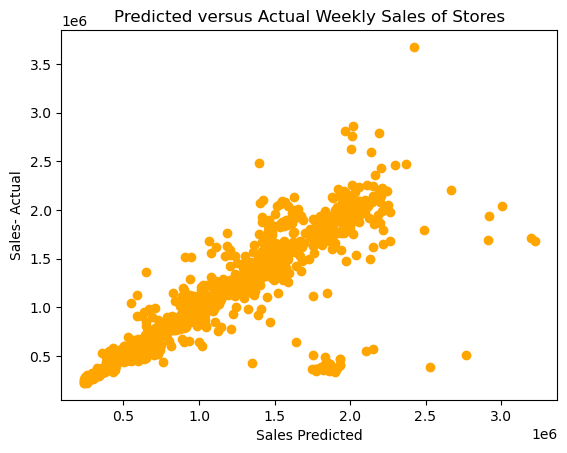

In [184]:
plt.scatter(gb_yhat, y_test, c='orange')
plt.xlabel('Sales Predicted')
plt.ylabel('Sales- Actual')
plt.title('Predicted versus Actual Weekly Sales of Stores')

plt.show()

In [180]:
train_resids = y_train*1000 - gb.predict(X_train_s)*1000
test_resids = y_test*1000 - gb_yhat*1000
gb_residue=np.abs(test_resids).sum()
# Let me look at the actual Residuals.
print("Train Residual",np.abs(train_resids).sum())
print("Test Residual",gb_residue)
print("Residual ratio of Test to Train",np.abs(test_resids).sum()/np.abs(train_resids).sum())

Train Residual 38477261121.16681
Test Residual 108208958060.46542
Residual ratio of Test to Train 2.8122832786801024


Support Vector Regression

In [181]:
from sklearn.svm import SVR
svr=SVR(C=50000.0, max_iter=500)

svr.fit(X_train_s, y_train)

SVR(C=50000.0, max_iter=500)

In [183]:
svr_scores = cross_val_score(svr, X_train_s, y_train, cv=10)
np.mean(svr_scores)

0.09792562248152054

In [184]:
svr_yhat=svr.predict(X_test_s)
svr_score=svr.score(X_test_s,y_test)
print("R2: ",svr_score)
svr_adj_r2 = 1 - (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)*(1-svr_score)
print("Adjusted R2: ",svr_adj_r2)

R2:  0.08053294238363695
Adjusted R2:  0.0733270877001232


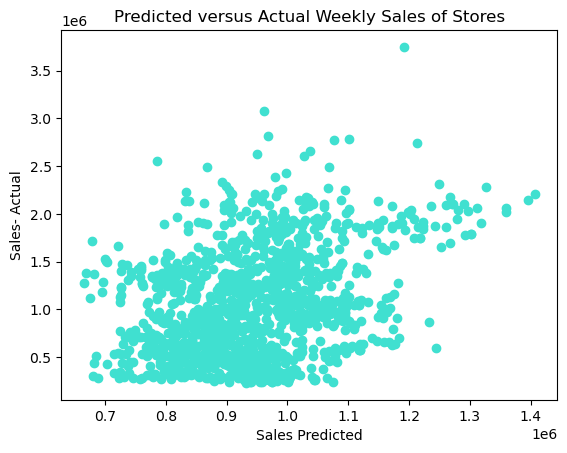

In [185]:
plt.scatter(svr_yhat, y_test, c='turquoise')
plt.xlabel('Sales Predicted')
plt.ylabel('Sales- Actual')
plt.title('Predicted versus Actual Weekly Sales of Stores')

plt.show()

In [186]:
train_resids = y_train*1000 - rfr.predict(X_train_s)*1000
test_resids = y_test*1000 - svr_yhat*1000
svr_residue=np.abs(test_resids).sum()
# Let me look at the actual Residuals.
print("Train Residual", np.abs(train_resids).sum())
print("Test Residual",svr_residue)
print("Residual ratio of Test to Train",np.abs(test_resids).sum()/np.abs(train_resids).sum())

Train Residual 113841066648.39996
Test Residual 552560321437.9512
Residual ratio of Test to Train 4.8537872817420356


In [190]:
# Create a dataframe to compare different models
Score=pd.DataFrame()
Score["Model_Name"]=('RandomForest','GradientBoosting','SupportVector')
Score["Test_Score"]=(rfr_score,gb_score,svr_score)
Score["Adj_R2"]=(rfr_adj_r2,gb_adj_r2,svr_adj_r2)
Score["Test_Residual"]=(rfr_residue,gb_residue,svr_residue)

In [ ]:
Insights & Conclusion

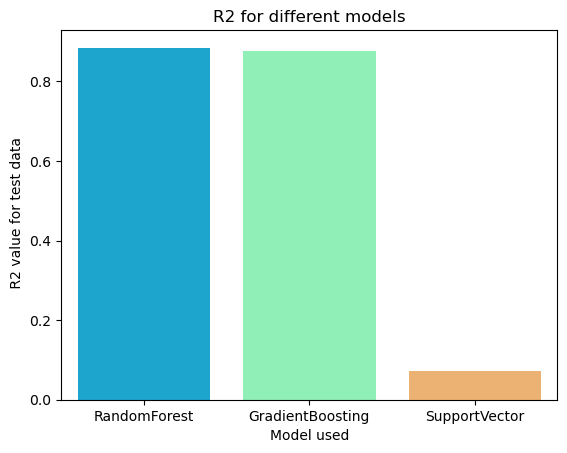

In [191]:
# Checking how the Type of the store have effect on the sales.
sns.barplot(x="Model_Name", y="Adj_R2", data=Score,orient='v', palette='rainbow')
plt.xlabel('Model used')
plt.ylabel(' R2 value for test data')
plt.title('R2 for different models')
#plt.savefig('./images/R2_for_different_models.png')
plt.show()

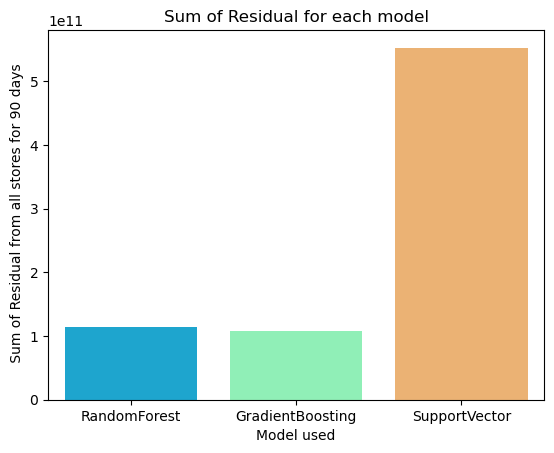

In [192]:
sns.barplot(x="Model_Name", y="Test_Residual", data=Score,orient='v', palette='rainbow')
plt.xlabel('Model used')
plt.ylabel(' Sum of Residual from all stores for 90 days')
plt.title('Sum of Residual for each model')
#plt.savefig('./images/Residual_for_different_models.png')
plt.show()


The rain forest regressor and Gradient Boosting Model  works good.

Finally, after building models to predict the weekly sales of 45 stores, we got the best accuracy of around 96% of accuracy.

Out of all the models, we select the   Gradient Boosting Model as our predictive Model since due to it's highest prediction accuracy with the lowest residual(error).